# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

We're going to try to create a model to enter the [Dogs vs Cats](https://www.kaggle.com/c/dogs-vs-cats) competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): *"**State of the art**: The current literature suggests machine classifiers can score above 80% accuracy on this task"*. So if we can beat 80%, then we will be at the cutting edge as of 2013!

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [1]:
%matplotlib inline

Define path to data: (It's a good idea to put it in a subdirectory of your notebooks folder, and then exclude that directory from git control by adding it to .gitignore.)

In [2]:
#Set directories we'll use
import os, sys
CURRENT_DIR = os.getcwd()
DATA_DIR = CURRENT_DIR + "/../data/kaggle/dogscats"

A few basic libraries that we'll need for the initial exercises:

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [4]:
import importlib, utils
importlib.reload(utils)

#import modules
from utils import *
from vgg16 import Vgg16


from utils import plots

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Preallocating 3276/4096 Mb (0.800000) on cuda0
Mapped name None to device cuda0: GeForce GTX 1050 (0000:01:00.0)
Using Theano backend.


In [5]:
%cd $DATA_DIR

#Create directories
utils.create_dir('valid')
utils.create_dir('results')
utils.create_dir('sample/train')
utils.create_dir('sample/test')
utils.create_dir('sample/valid')
utils.create_dir('sample/results')
utils.create_dir('test/unknown')

C:\Users\mplan\dev\data\kaggle\dogscats


In [17]:
# Place 2000 validation images into the train directory
%cd $DATA_DIR/train

g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_DIR+'/valid/' + shuf[i])

C:\Users\mplan\dev\data\kaggle\dogscats\train
['dog.7097.jpg' 'dog.12309.jpg' 'cat.7566.jpg' ..., 'dog.6527.jpg' 'dog.4018.jpg' 'dog.8040.jpg']


In [20]:
from shutil import copyfile

In [21]:
# Place 200 images into the sample training directory
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_DIR+'/sample/train/' + shuf[i])

In [23]:
%cd $DATA_DIR/valid

C:\Users\mplan\dev\data\kaggle\dogscats\valid


In [25]:
# PLace 50 images in the sample validation directory
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_DIR+'/sample/valid/' + shuf[i])

In [28]:
#Divide cat/dog images into separate directories

%cd $DATA_DIR/sample/train
utils.create_dir('cats')
utils.create_dir('dogs')
!move cat.*.jpg cats/
!move dog.*.jpg dogs/

%cd $DATA_DIR/sample/valid
utils.create_dir('cats')
utils.create_dir('dogs')
!move cat.*.jpg cats/
!move dog.*.jpg dogs/

%cd $DATA_DIR/valid
utils.create_dir('cats')
utils.create_dir('dogs')
!move cat.*.jpg cats/
!move dog.*.jpg dogs/

%cd $DATA_DIR/train
utils.create_dir('cats')
utils.create_dir('dogs')
!move cat.*.jpg cats/
!move dog.*.jpg dogs/

C:\Users\mplan\dev\data\kaggle\dogscats\sample\train
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10120.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10326.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10497.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.1056.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10600.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10635.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10759.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.10768.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.1097.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.1122.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.11373.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.11569.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\train\cat.11602.jpg
C:\Users\mplan\

C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.10956.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.11247.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.11363.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.11972.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.1215.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.1217.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.12171.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.229.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.2369.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.2399.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.2979.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.399.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.4056.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.4166.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\sample\valid\cat.4575.jpg
C:\User

C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10018.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10025.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10027.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10036.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10039.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10051.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10076.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10080.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10089.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10100.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10106.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10109.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10113.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10117.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.10123.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\valid\dog.1013.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\v

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.0.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.1.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.100.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.1000.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10000.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10001.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10002.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10003.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10004.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10005.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10006.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10007.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10008.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10009.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.10010.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.1001

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11209.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.1121.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11210.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11211.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11212.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11213.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11214.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11215.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11216.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11217.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11218.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11219.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.1122.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11220.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11221.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.11222.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\tr

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2479.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.248.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2480.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2481.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2482.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2483.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2484.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2485.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2486.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2487.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2488.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2489.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2490.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2491.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2492.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2493.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.2494.jp

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5060.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5061.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5062.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5063.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5065.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5066.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5067.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5068.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5069.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.507.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5070.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5071.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5072.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5073.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5074.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5075.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.5076.jp

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7505.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7506.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7508.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7509.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.751.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7510.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7511.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7513.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7514.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7515.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7516.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7518.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7519.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.752.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7520.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7522.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.7523.jpg

C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9922.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9923.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9924.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9925.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9926.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9927.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9928.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9929.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9930.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9931.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9933.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9934.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9935.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9936.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9937.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9938.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\cat.9939.j

C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10826.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10827.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10828.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10829.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1083.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10830.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10831.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10832.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10833.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10834.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10835.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10836.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10837.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10838.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.10839.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1084.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\tr

C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1477.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1478.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1479.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.148.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1480.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1481.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1482.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1483.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1485.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1486.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1487.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1488.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1489.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.149.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1490.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1491.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.1493.jpg

C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3733.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3734.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3735.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3736.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3737.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3738.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3739.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.374.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3740.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3741.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3742.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3743.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3744.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3745.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3746.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3747.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.3748.jp

C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6021.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6022.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6023.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6024.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6025.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6026.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6027.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6028.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6029.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.603.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6030.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6031.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6033.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6034.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6035.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6036.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.6037.jp

C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8729.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.873.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8730.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8731.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8732.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8733.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8734.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8735.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8736.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8737.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8738.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8739.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.874.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8740.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8741.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8742.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\train\dog.8743.jpg

In [23]:
# Create single 'unknown' class for test set
%cd $DATA_DIR/test
!move *.jpg unknown/

C:\Users\mplan\dev\data\kaggle\dogscats\test
C:\Users\mplan\dev\data\kaggle\dogscats\test\1.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\100.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\1000.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10000.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10001.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10002.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10003.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10004.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10005.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10006.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10007.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10008.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10009.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\1001.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10010.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\10011.jpg
C:\Users\mplan\dev\data\kaggle\

C:\Users\mplan\dev\data\kaggle\dogscats\test\11256.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11257.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11258.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11259.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\1126.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11260.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11261.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11262.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11263.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11264.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11265.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11266.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11267.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11268.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11269.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\1127.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11270.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\11271.jpg
C:\Users\mpl

C:\Users\mplan\dev\data\kaggle\dogscats\test\2352.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2353.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2354.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2355.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2356.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2357.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2358.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2359.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\236.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2360.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2361.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2362.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2363.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2364.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2365.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2366.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2367.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\2368.jpg
C:\Users\mplan\dev\data\kaggl

C:\Users\mplan\dev\data\kaggle\dogscats\test\4472.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4473.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4474.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4475.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4476.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4477.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4478.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4479.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\448.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4480.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4481.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4482.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4483.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4484.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4485.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4486.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4487.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\4488.jpg
C:\Users\mplan\dev\data\kaggl

C:\Users\mplan\dev\data\kaggle\dogscats\test\6944.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6945.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6946.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6947.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6948.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6949.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\695.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6950.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6951.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6952.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6953.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6954.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6955.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6956.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6957.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6958.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\6959.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\696.jpg
C:\Users\mplan\dev\data\kaggle

C:\Users\mplan\dev\data\kaggle\dogscats\test\9218.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9219.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\922.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9220.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9221.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9222.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9223.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9224.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9225.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9226.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9227.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9228.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9229.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\923.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9230.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9231.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9232.jpg
C:\Users\mplan\dev\data\kaggle\dogscats\test\9233.jpg
C:\Users\mplan\dev\data\kaggle

# Use a pretrained VGG model with our **Vgg16** class

In [5]:
%cd $DATA_DIR


from vgg16 import Vgg16

#Set path to sample/ path if desired
path = DATA_DIR + '/' #'/sample/'
test_path = DATA_DIR + '/test/'
results_path=DATA_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

C:\Users\mplan\dev\data\kaggle\dogscats


In [15]:
#import Vgg16 helper class
vgg = Vgg16()

In [16]:
#Set constants. You can experiment with no_of_epochs to improve the model
batch_size=16
no_of_epochs=3

In [17]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 1032s - loss: 0.4758 - acc: 0.9646 - val_loss: 0.2704 - val_acc: 0.9820
Running epoch: 1
Epoch 1/1
23000/23000 [==============================] - 1231s - loss: 0.4063 - acc: 0.9729 - val_loss: 0.3738 - val_acc: 0.9750
Running epoch: 2
Epoch 1/1
23000/23000 [==============================] - 1026s - loss: 0.4047 - acc: 0.9732 - val_loss: 0.1778 - val_acc: 0.9885
Completed 3 fit operations


##Now create predictions



In [25]:
print(path)
print(test_path)
#test_batches = vgg.get_batches(test_path, shuffle=False, batch_size=batch_size, class_mode=None)

batches, preds = vgg.test(test_path, batch_size = batch_size*2)

C:\Users\mplan\dev\fastai/../data/kaggle/dogscats/
C:\Users\mplan\dev\fastai/../data/kaggle/dogscats/test/
Found 12500 images belonging to 1 classes.


In [27]:
#For every image, vgg.test() generates two probabilities 
#based on how we've ordered the cats/dogs directories.
#It looks like column one is cats and column two is dogs
print (preds[:5])

filenames = batches.filenames
print (filenames[:5])

[[ 0.9663  0.0337]
 [ 0.3432  0.6568]
 [ 0.5911  0.4089]
 [ 0.7333  0.2667]
 [ 0.2976  0.7024]]
['unknown\\1.jpg', 'unknown\\10.jpg', 'unknown\\100.jpg', 'unknown\\1000.jpg', 'unknown\\10000.jpg']


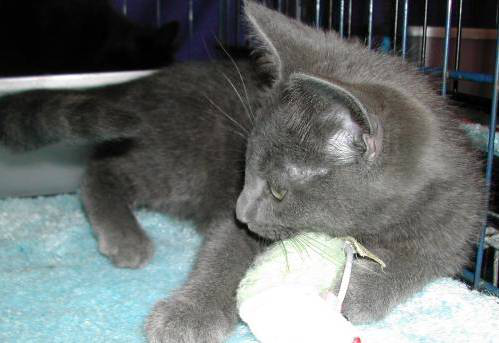

In [28]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [29]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)